# <center> <font style="color:rgb(100,109,254)"> Playing Rock, Paper, Scissors with AI</font> </center>


##  <font style="color:rgb(134,19,348)">Import Libraries </font>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense,MaxPool2D,Dropout,Flatten,Conv2D,GlobalAveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from random import choice,shuffle
from scipy import stats as st

from collections import deque

##  <font style="color:rgb(134,19,348)"> Step 1: Gather Data, for rock, paper scissor classes.</font>

In [14]:
def gather_data(num_samples):
    
    global rock, paper, scissor, nothing
    
    # Initialize the camera
    cap = cv2.VideoCapture(0,  cv2.CAP_DSHOW)

    # trigger tells us when to start recording
    trigger = False
    
    # Counter keeps count of the number of samples collected
    counter = 0
    
    # This the ROI size, the size of images saved will be box_size -10
    box_size = 234
    
    # Getting the width of the frame from the camera properties
    width = int(cap.get(3))


    while True:
        
        # Read frame by frame
        ret, frame = cap.read()
        
        # Flip the frame laterally
        frame = cv2.flip(frame, 1)
        
        # Break the loop if there is trouble  reading the frame.
        if not ret:
            break
            
        # If counter is equal to the number samples then reset triger and the counter
        if counter == num_samples:
            trigger = not trigger
            counter = 0
        
        # Define ROI for capturing samples
        cv2.rectangle(frame, (width - box_size, 0), (width, box_size), (0, 250, 150), 2)
        
        # Make a resizable window.
        cv2.namedWindow("Collecting images", cv2.WINDOW_NORMAL)
        
        
        # If trigger is True than start capturing the samples
        if trigger:
            
            # Grab only slected roi
            roi = frame[5: box_size-5 , width-box_size + 5: width -5]
            
            # Append the roi and class name to the list with the selected class_name
            eval(class_name).append([roi, class_name])
                                    
            # Increment the counter 
            counter += 1 
        
            # Text for the counter
            text = "Collected Samples of {}: {}".format(class_name, counter)
            
        else:
            text = "Press 'r' to collect rock samples, 'p'-paper, 's'-scissor, 'n'-nothing, 'q'-exit"
            text2 = "wait for 100 counter for each sample"
        
        # Show the counter on the imaege
        cv2.putText(frame, text, (3, 350), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 1, cv2.LINE_AA)
        cv2.putText(frame, text2, (3, 375), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 1, cv2.LINE_AA)
        
        # Display the window
        cv2.imshow("Collecting images", frame)
        
        # Wait 1 ms
        k = cv2.waitKey(1)
        
        # If user press 'r' than set the path for rock directoryq
        if k == ord('r'):
            
            # Trigger the variable inorder to capture the samples
            trigger = not trigger
            class_name = 'rock'
            rock = []
           
            
        # If user press 'p' then class_name is set to paper and trigger set to True  
        if k == ord('p'):
            trigger = not trigger
            class_name = 'paper'
            paper = []
        
        # If user press 's' then class_name is set to scissor and trigger set to True  
        if k == ord('s'):
            trigger = not trigger
            class_name = 'scissor'
            scissor = []
                    
        # If user press 's' then class_name is set to nothing and trigger set to True
        if k == ord('n'):
            trigger = not trigger
            class_name = 'nothing'
            nothing = []
        
        # Exit if user presses 'q'
        if k == ord('q'):
            break
            
    #  Release the camera and destroy the window
    cap.release()
    cv2.destroyAllWindows()

Now run the function

In [15]:
no_of_samples = 100
gather_data(no_of_samples)

##  <font style="color:rgb(134,19,348)"> Step 2: (Optional) Visualize the Data:
 </font>

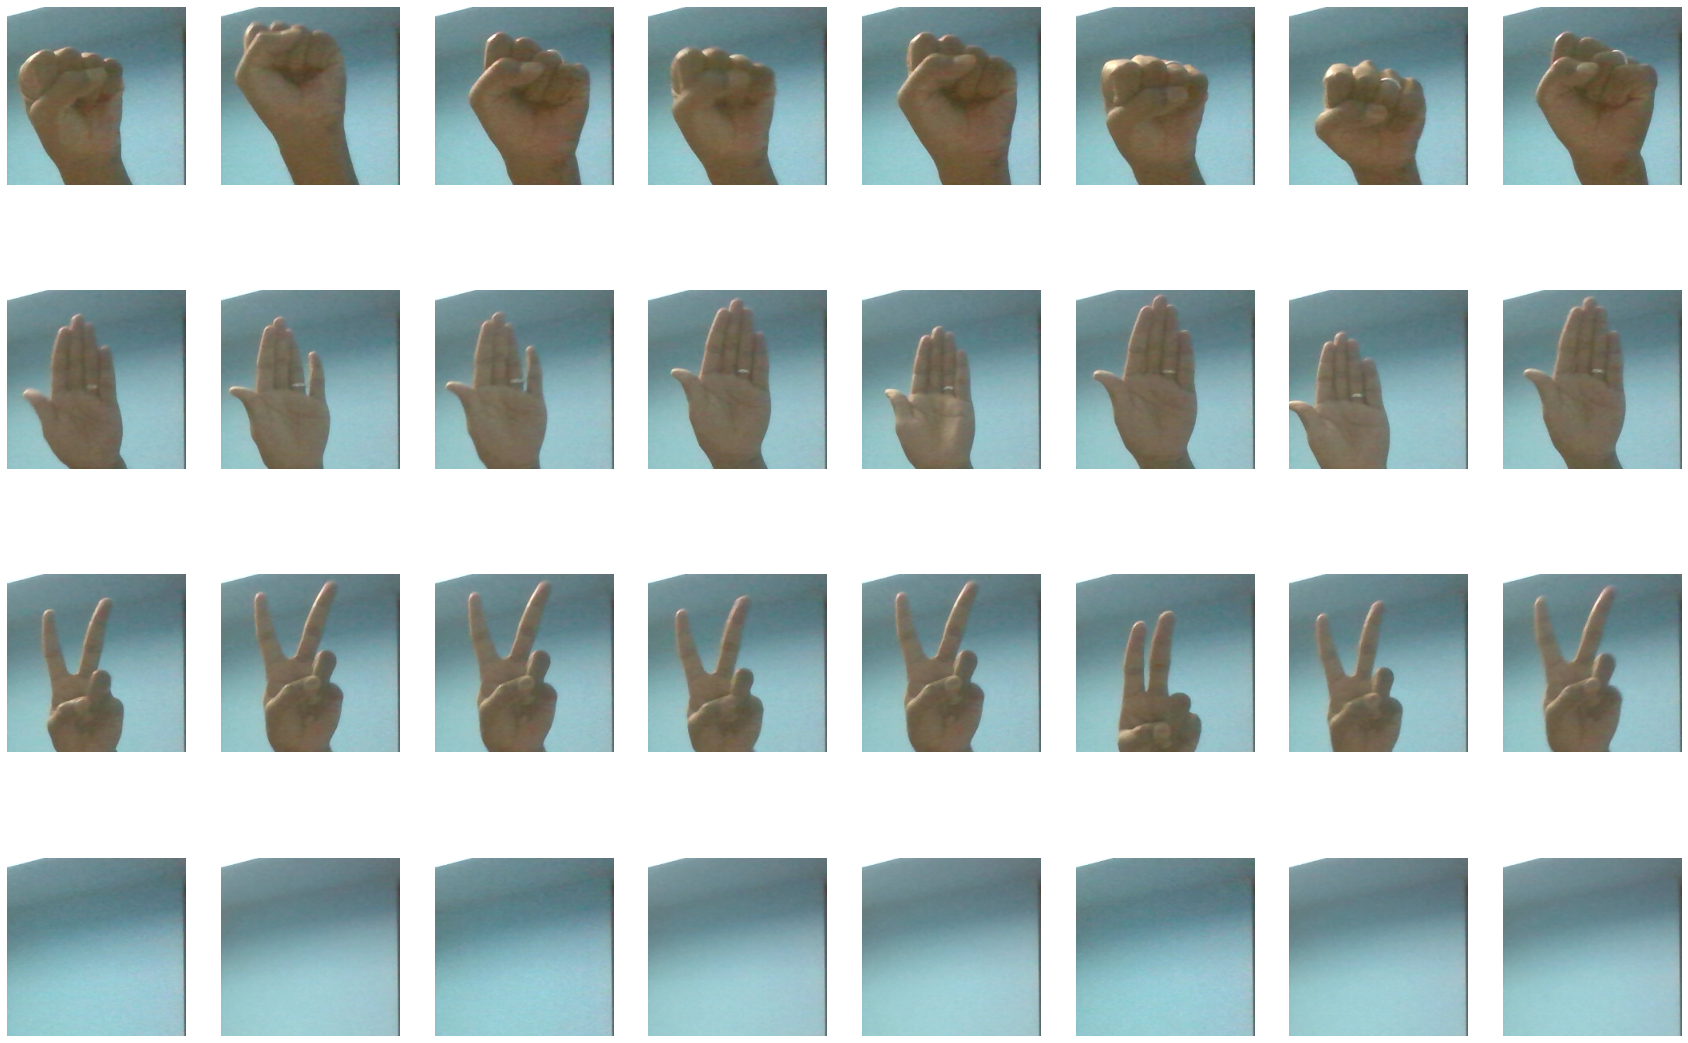

In [13]:
# Set the figure size
plt.figure(figsize=[30,20])

# Set the rows and columns
rows, cols = 4, 8

# Iterate for each class
for class_index, each_list in enumerate([rock, paper, scissor,nothing]):
    
    # Get 8 random indexes, since we will be showing 8 examples of each class.
    r = np.random.randint(no_of_samples, size=8);
    
    # Plot the examples
    for i, example_index in enumerate(r,1):
        plt.subplot(rows,cols,class_index*cols + i );plt.imshow(each_list[example_index][0][:,:,::-1]);plt.axis('off');   

##  <font style="color:rgb(134,19,348)"> Step 3: Preprocess Data and Split it:
 </font>

In [14]:
# Combine the labels of all classes together
labels = [tupl[1] for tupl in rock] + [tupl[1] for tupl in paper] + [tupl[1] for tupl in scissor] +[tupl[1] for tupl in nothing]

# Combine the images of all classes together
images = [tupl[0] for tupl in rock] + [tupl[0] for tupl in paper] + [tupl[0] for tupl in scissor] +[tupl[0] for tupl in nothing]

# Normalize the images by dividing by 255, now our images are in range 0-1. This will help in training.
images = np.array(images, dtype="float") / 255.0

# Print out the total number of labels and images.
print('Total images: {} , Total Labels: {}'.format(len(labels), len(images)))

# Create an encoder Object
encoder = LabelEncoder()

# Convert Lablels to integers. i.e. nothing = 0, paper = 1, rock = 2, scissor = 3 (mapping is done in alphabatical order)
Int_labels = encoder.fit_transform(labels)

# Now the convert the integer labels into one hot format. i.e. 0 = [1,0,0,0]  etc.
one_hot_labels = to_categorical(Int_labels, 4)

# Now we're splitting the data, 75% for training and 25% for testing.
(trainX, testX, trainY, testY) = train_test_split(images, one_hot_labels, test_size=0.25, random_state=50)

# Empty memory from RAM
images = []


# This can further free up memory from RAM but be careful, if you won't be able to chage split % after this.
# rock, paper, scissor = [], [], []

Total images: 400 , Total Labels: 400


##  <font style="color:rgb(134,19,348)">Step 4: Prepare Our Model for Fine Tuning:
 </font>

In [16]:
# This is the input size which our model accepts.
image_size = 224

# Loading pre-trained NASNETMobile Model without the head by doing include_top = False
N_mobile = tf.keras.applications.NASNetMobile( input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')

# Freeze the whole model 
N_mobile.trainable = False
    
# Adding our own custom head
# Start by taking the output feature maps from NASNETMobile
x = N_mobile.output

# Convert to a single dimensional vector by Global Average Pooling. 
# We could also use Flatten()(x) GAP is more effective reduces params and controls overfitting.
x = GlobalAveragePooling2D()(x)

# Adding a dense layer with 512 units
x = Dense(712, activation='relu')(x) 

# Dropout 20% of the activations, helps reduces overfitting
x = Dropout(0.40)(x)

# The fianl layer will contain 4 output units (no of units = no of classes) with softmax function.
preds = Dense(4,activation='softmax')(x) 

# Construct the full model
model = Model(inputs=N_mobile.input, outputs=preds)

# Check the number of layers in the final Model
print ("Number of Layers in Model: {}".format(len(model.layers[:])))

Number of Layers in Model: 773


##  <font style="color:rgb(134,19,348)"> Step 5: Train Our Model:
 </font>

In [17]:
# Adding transformations that I know would help, you can feel free to add more.
# I'm doing horizontal_flip = False, incase you aren't sure which hand you would be using you can make that True.

augment = ImageDataGenerator( 
    
        rotation_range=30,
        zoom_range=0.25,
        width_shift_range=0.10,
        height_shift_range=0.10,
        shear_range=0.10,
        horizontal_flip=False,    
        fill_mode="nearest"
)

In [18]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Set batchsize according to your system
epochs = 15
batchsize = 20

# Start training
history = model.fit(x=augment.flow(trainX, trainY, batch_size=batchsize), validation_data=(testX, testY), 
steps_per_epoch= len(trainX) // batchsize, epochs=epochs)

# Use model.fit_generator function instead if TF version < 2.2
#history = model.fit_generator(x = augment.flow(trainX, trainY, batch_size=batchsize), validation_data=(testX, testY), 
#steps_per_epoch= len(trainX) // batchsize, epochs=epochs)

Epoch 1/15
15/15 [==============================] - 17s 1s/step - loss: 1.0145 - accuracy: 0.5933 - val_loss: 0.6492 - val_accuracy: 0.9000
Epoch 2/15
15/15 [==============================] - 14s 917ms/step - loss: 0.4765 - accuracy: 0.8767 - val_loss: 0.2800 - val_accuracy: 1.0000
Epoch 3/15
15/15 [==============================] - 22s 1s/step - loss: 0.2867 - accuracy: 0.9500 - val_loss: 0.1469 - val_accuracy: 1.0000
Epoch 4/15
15/15 [==============================] - 22s 1s/step - loss: 0.1776 - accuracy: 0.9833 - val_loss: 0.1034 - val_accuracy: 1.0000
Epoch 5/15
15/15 [==============================] - 22s 1s/step - loss: 0.1358 - accuracy: 0.9900 - val_loss: 0.0745 - val_accuracy: 1.0000
Epoch 6/15
15/15 [==============================] - 22s 1s/step - loss: 0.1094 - accuracy: 0.9933 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 7/15
15/15 [==============================] - 22s 1s/step - loss: 0.0807 - accuracy: 0.9900 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 8/15
15/15 

##  <font style="color:rgb(134,19,348)"> Step 6: Check our Accuracy, Loss graphs & save the model.
 </font>

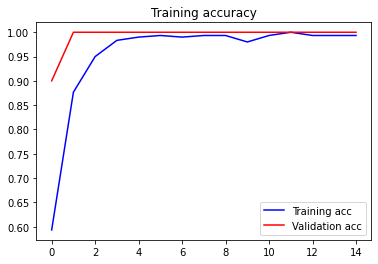

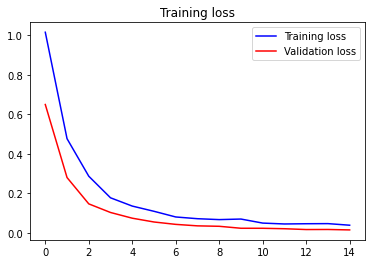

In [20]:
# Plot the accuracy and loss curves

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

####  <font style="color:rgb(134,19,348)"> Save the model </font>

In [21]:
model.save("rps4.h5", overwrite=True)

####  <font style="color:rgb(134,19,348)"> Load the model </font>

In [16]:
model = load_model("rps4.h5")

##  <font style="color:rgb(134,19,348)"> Step 7: Test on Live Webcam Feed:
 </font>

In [17]:
# This list will be used to map probabilities to class names, Label names are in alphabatical order.
label_names = ['nothing', 'paper', 'rock', 'scissor']

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
box_size = 234
width = int(cap.get(3))

while True:
    
    ret, frame = cap.read()
    if not ret:
        break
        
    frame = cv2.flip(frame, 1)
           
    cv2.rectangle(frame, (width - box_size, 0), (width, box_size), (0, 250, 150), 2)
        
    cv2.namedWindow("Rock Paper Scissors", cv2.WINDOW_NORMAL)

    roi = frame[5: box_size-5 , width-box_size + 5: width -5]
    
    # Normalize the image like we did in the preprocessing step, also convert float64 array.
    roi = np.array([roi]).astype('float64') / 255.0
 
    # Get model's prediction.
    pred = model.predict(roi)
    
    # Get the index of the target class.
    target_index = np.argmax(pred[0])

    # Get the probability of the target class
    prob = np.max(pred[0])

    # Show results
    cv2.putText(frame, "prediction: {} {:.2f}%".format(label_names[np.argmax(pred[0])], prob*100 ),
                (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.90, (0, 0, 255), 2, cv2.LINE_AA)
    
    cv2.imshow("Rock Paper Scissors", frame)
    
   
    k = cv2.waitKey(1)
    if k == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

##  <font style="color:rgb(134,19,348)"> Step 8: Create the Final Application:
 </font>
 

 It’s time for the finale, we will now take our final model and build a full application out of it, for our final script we have 3 different helper functions

###  <font style="color:rgb(134,19,348)"> Function for finding the Winner </font>
First we need a function that takes two moves, one by the user and one the computer and then finds out who won that round. This function is pretty simple as you can see below.

In [18]:
def findout_winner(user_move, Computer_move):
    
    # All logic below is self explanatory 
    
    if user_move == Computer_move:
        return "Tie"
    
    
    elif user_move == "rock" and Computer_move == "scissor":
        return "User"
    
    elif user_move == "rock" and Computer_move == "paper":
        return "Computer"
    
    elif user_move == "scissor" and Computer_move == "rock":
        return "Computer"
    
    elif user_move == "scissor" and Computer_move == "paper":
        return "User"
    
    elif user_move == "paper" and Computer_move == "rock":
        return "User"
    
    elif user_move == "paper" and Computer_move == "scissor":
        return "Computer"

**Let’s test this function.**

In [19]:
user_move = 'paper'
computer_move = choice(['rock', 'paper', 'scissor'])

winner = findout_winner(user_move, computer_move)

print("User Selected '{}' and computer selected '{}' , winner is: '{}' ".format(user_move, computer_move, winner))

User Selected 'paper' and computer selected 'rock' , winner is: 'User' 


**Let’s do another one.**

In [20]:
user_move = 'paper'
computer_move = choice(['rock', 'paper', 'scissor'])

winner = findout_winner(user_move, computer_move)

print("User Selected '{}' and computer selected '{}' , winner is: '{}' ".format(user_move, computer_move, winner))

User Selected 'paper' and computer selected 'scissor' , winner is: 'Computer' 


###  <font style="color:rgb(134,19,348)"> Function for Showing the Winner for the Full Game </font>

This function decides who's the winner based on the points and then shows an image with results, After the game is  over you can press 'ENTER' to play again or any other key to exit.

In [21]:
def show_winner(user_socre, computer_score):    
    
    if user_score > computer_score:
        img = cv2.imread("images/youwin.jpg")
        
    elif user_score < computer_score:
        img = cv2.imread("images/comwins.jpg")
        
    else:
        img = cv2.imread("images/draw.jpg")
        
    cv2.putText(img, "Press 'ENTER' to play again, else exit",
                (150, 530), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA)
    
    cv2.imshow("Rock Paper Scissors", img)
    
    # If enter is pressed.
    k = cv2.waitKey(0)
    
    # If the user presses 'ENTER' key then return TRUE, otherwise FALSE
    if k == 13:
       return True

    else:
        return False

###  <font style="color:rgb(134,19,348)"> Function for Displaying Computer's Move (Optional) </font>

This function displays a picture of either 'rock', 'paper' or  'scissor' based on what the computer played. 

In [22]:
def display_computer_move(computer_move_name, frame):
    
    icon = cv2.imread( "images/{}.png".format(computer_move_name), 1)
    icon = cv2.resize(icon, (224,224))
    
    # This is the portion which we are going to replace with the icon image
    roi = frame[0:224, 0:224]

    # Get binary mask from the transparent image, 4th channel is the alpha channel 
    mask = icon[:,:,-1] 

    # Making the mask completely binary (black & white)
    mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)[1]

    # Store the normal bgr image
    icon_bgr = icon[:,:,:3] 
    
    # Now combine the foreground of the icon with background of ROI 
    
    img1_bg = cv2.bitwise_and(roi, roi, mask = cv2.bitwise_not(mask))

    img2_fg = cv2.bitwise_and(icon_bgr, icon_bgr, mask = mask)

    combined = cv2.add(img1_bg, img2_fg)

    frame[0:224, 0:224] = combined

    return frame

###  <font style="color:rgb(134,19,348)"> Final Application </font>

In [23]:
cap = cv2.VideoCapture(0)
box_size = 234
width = int(cap.get(3))

# Specify the number of attempts you want. This means best of 5.
attempts = 5

# Initially the moves will be `nothing`
computer_move_name= "nothing"
final_user_move = "nothing"

label_names = ['nothing', 'paper', 'rock', 'scissor']

# All scores are 0 at the start.
computer_score, user_score = 0, 0

# The default color of bounding box is Blue
rect_color = (255, 0, 0)

# This variables remembers if the hand is inside the box or not.
hand_inside = False

# At each iteration we will decrease the total_attempts value by 1
total_attempts = attempts

# We will only consider predictions having confidence above this threshold.
confidence_threshold = 0.70

# Instead of working on a single prediciton, we will take the mode of 5 predictons by using a deque object
# This way even if we face a false postive, we would easily ignore it
smooth_factor = 5

# Our initial deque list will have 'nothing' repeated 5 times.
de = deque(['nothing'] * 5, maxlen=smooth_factor)

while True:
    
    ret, frame = cap.read()
    
    if not ret:
        break
        
    frame = cv2.flip(frame, 1)
           
    cv2.namedWindow("Rock Paper Scissors", cv2.WINDOW_NORMAL)

    # extract the region of image within the user rectangle
    roi = frame[5: box_size-5 , width-box_size + 5: width -5]
    
    roi = np.array([roi]).astype('float64') / 255.0
    
    # Predict the move made
    pred = model.predict(roi)
    
    # Get the index of the predicted class
    move_code = np.argmax(pred[0])
   
    # Get the class name of the predicted class
    user_move = label_names[move_code]
    
    # Get the confidence of the predicted class
    prob = np.max(pred[0])
    
    # Make sure the probability is above our defined threshold
    if prob >= confidence_threshold:
        
        # Now add the move to deque list from left
        de.appendleft(user_move)
        
        # Get the mode i.e. which class has occured more frequently in the last 5 moves.
        try:
            final_user_move = st.mode(de)[0][0] 
            
        except StatisticsError:
            print('Stats error')
            continue
             
        # If nothing is not true and hand_inside is False then proceed.
        # Basically the hand_inside variable is helping us to not repeatedly predict during the loop
        # So now the user has to take his hands out of the box for every new predicton.
        
        if final_user_move != "nothing" and hand_inside == False:
            
            # Set hand inside to True
            hand_inside = True 
            
            # Get Computer's move and then get the winner.
            computer_move_name = choice(['rock', 'paper', 'scissor'])
            winner = findout_winner(final_user_move, computer_move_name)
            
            # Display the computer's move
            display_computer_move(computer_move_name, frame)
            
            # Subtract one attempt
            total_attempts -= 1
            
            # If winner is computer then it gets points and vice versa.
            # We're also changing the color of rectangle based on who wins the round.

            if winner == "Computer":
                computer_score +=1
                rect_color = (0, 0, 255)

            elif winner == "User":
                user_score += 1;
                rect_color = (0, 250, 0)
                
            
            elif winner == "Tie":
                rect_color = (255, 250, 255)
                
                
            # If all the attempts are up then find our the winner      
            if total_attempts == 0:
                
                play_again = show_winner(user_score, computer_score)
                
                # If the user pressed Enter then restart the game by re initializing all variables
                if play_again:
                    user_score, computer_score, total_attempts = 0, 0, attempts
                
                # Otherwise quit the program.
                else:
                    break
        
        # Display images when the hand is inside the box even when hand_inside variable is True.
        elif final_user_move != "nothing" and hand_inside == True:
            display_computer_move(computer_move_name, frame)
    
        # If class is nothing then hand_inside becomes False
        elif final_user_move == 'nothing':            
            hand_inside = False
            rect_color = (255, 0, 0)
 

    # This is where all annotation is happening. 

    cv2.putText(frame, "Your Move: " + final_user_move,
                    (420, 270), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv2.LINE_AA)

    cv2.putText(frame, "Computer's Move: " + computer_move_name,
                (2, 270), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv2.LINE_AA)

    cv2.putText(frame, "Your Score: " + str(user_score),
                    (420, 300), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv2.LINE_AA)
    cv2.putText(frame, "Computer Score: " + str(computer_score),
                    (2, 300), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv2.LINE_AA)
    
    cv2.putText(frame, "Attempts left: {}".format(total_attempts), (190, 400), cv2.FONT_HERSHEY_COMPLEX, 0.7,
                (100, 2, 255), 1, cv2.LINE_AA)
    
    
    cv2.rectangle(frame, (width - box_size, 0), (width, box_size), rect_color, 2)

    # Display the image    
    cv2.imshow("Rock Paper Scissors", frame)

    # Exit if 'q' is pressed 
    k = cv2.waitKey(10)
    if k == ord('q'):
        break

# Relase the camera and destroy all windows.
cap.release()
cv2.destroyAllWindows()